In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
confirmedDeaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmedDeaths = confirmedDeaths.drop(axis=1, labels=['Lat', 'Long', 'Province/State'])

In [3]:
groupedDeaths = confirmedDeaths.groupby('Country/Region').sum()

In [4]:
deathsItalyUK = groupedDeaths.loc[['Italy', 'United Kingdom', 'China', 'Spain']].T
deathsItalyUK.index = pd.to_datetime(deathsItalyUK.index, format='%m/%d/%y')

In [5]:
origins = (deathsItalyUK >= 1).idxmax()
daysSinceFirstDeath = pd.DataFrame()
daysSinceFirstDeath['China'] = deathsItalyUK['China']

for county in deathsItalyUK.columns:
    deaths = deathsItalyUK[county].loc[deathsItalyUK.index > origins[county]].values
    daysSinceFirstDeath[county] = np.nan
    daysSinceFirstDeath.iloc[0:len(deaths), daysSinceFirstDeath.columns.get_loc(county)] = deaths

daysSinceFirstDeath = daysSinceFirstDeath.reset_index(drop=True)

In [6]:
deathRateByDate = daysSinceFirstDeath.copy()
deathRateByDate = deathRateByDate.fillna(method='pad')
deathRateByDate.iloc[0:-1] = deathRateByDate.iloc[1:].values - deathRateByDate.iloc[0:-1].values
deathRateByDate.drop(deathRateByDate.tail(1).index,inplace=True)
deathRateByDate = deathRateByDate.replace(0, np.nan).fillna(method='bfill')

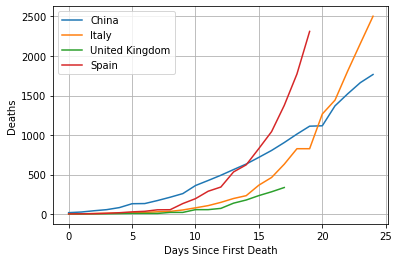

In [7]:
ax = daysSinceFirstDeath.iloc[0:25].plot()
ax.set(xlabel="Days Since First Death", ylabel="Deaths")
ax.grid()
ax.get_figure().savefig('Covid-19 Deaths (Total)- zoomed.png', dpi=600, bbox_inches='tight')

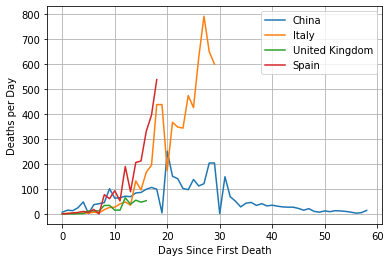

In [8]:
ax = deathRateByDate.plot()
ax.set(xlabel="Days Since First Death", ylabel="Deaths per Day")
ax.grid()
ax.get_figure().savefig('Covid-19 Deaths (Per Day).png', dpi=600, bbox_inches='tight')